# Analysis of Video Game Sales and Popularity

## Explorary Data Analysis

### Importing Necessary Libraries

In [1]:
#Data Preprocessing 
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns 
import re 
#Model Development
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
import sklearn.model_selection as ms
#Linear Regession
from sklearn.linear_model import LinearRegression
#SVC

#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn import metrics
#Random Forest

#Gradient Boosting 
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [2]:
vg = pd.read_csv("video_games_sales.csv") #vg = video games 
vg = vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})
print(f"Columns Names in the Dataframe:\n{vg.columns.tolist()}\n")
print(f"Quantity of of null/missing data entries:\n{vg.isnull().sum()}")
print(f"Data Types and Quantity of Data:\n{vg.info()}\n") #shows all variables in the dataset, the quantity of non-null data points in each variables, and the amount of each data type
print(f"Column Names in the Dataset\n{vg.columns.tolist()}\n")
print("Summary Stats of the Numeric Variables:\n")
vg.describe().T

Columns Names in the Dataframe:
['Sales Rank', 'name', 'platform', 'year', 'genre', 'publisher', 'North American Sales (in millions)', 'European Sales (in millions)', 'Japan Sales (in millions)', 'Other Sales (in millions)', 'Global Sales (in millions)']

Quantity of of null/missing data entries:
Sales Rank                              0
name                                    0
platform                                0
year                                  271
genre                                   0
publisher                              58
North American Sales (in millions)      0
European Sales (in millions)            0
Japan Sales (in millions)               0
Other Sales (in millions)               0
Global Sales (in millions)              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              ------------

,count,mean,std,min,25%,50%,75%,max
Sales Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
North American Sales (in millions),16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
European Sales (in millions),16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
Japan Sales (in millions),16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other Sales (in millions),16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global Sales (in millions),16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


As seen in the table above, the variable *year* has some missing data points, this will be addressed during model development when the missing data will be replaced with imputed values using available *year* data. Platform will be one-hot encoded to address its missing values.

Furthermore, many variable names have been changed for easier understanding of what each variable tracks. 

In [3]:
vg.head()

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions),European Sales (in millions),Japan Sales (in millions),Other Sales (in millions),Global Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


First five rows of data

In [4]:
vg.tail()

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions),European Sales (in millions),Japan Sales (in millions),Other Sales (in millions),Global Sales (in millions)
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Last five rows of data

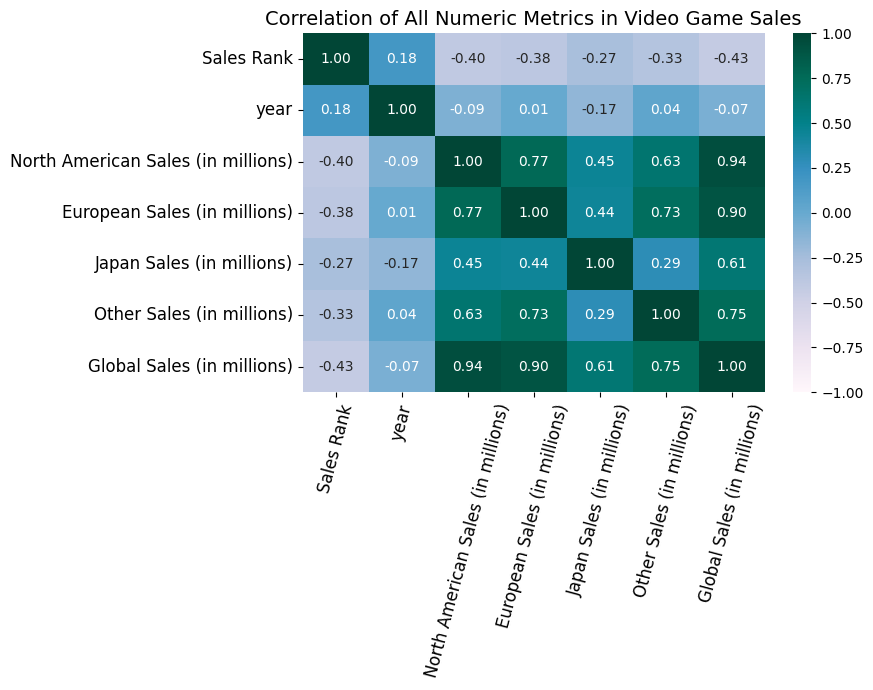

In [5]:
numeric_vg = vg.select_dtypes(include = ["int64", "float64"])
corr_matrix = numeric_vg.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", fmt = ".2f", vmin = -1, vmax = 1)
plt.title("Correlation of All Numeric Metrics in Video Game Sales", fontsize = 14)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.savefig("Correlation of All Numeric Metrics in Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

The correlation matrix above shows a moderate to correlation between each regional sale and global sales, this expected since each regional sale is used to calculate the overall global sales. Global Sales and Other Sales will be removed during model development to reduce the chances of collinearity and an unfair skew.

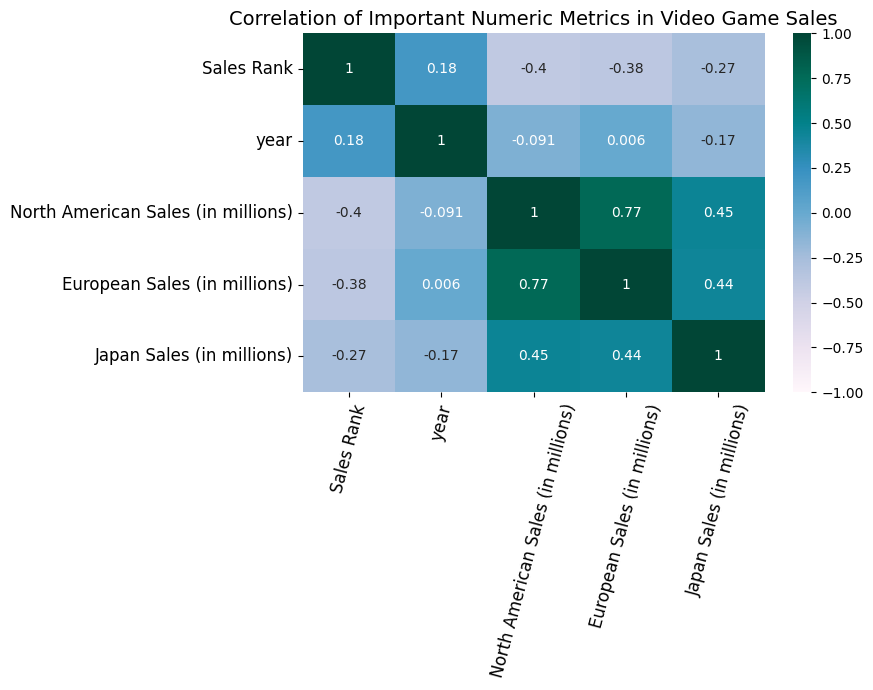

In [6]:
numeric_vg1 = vg.select_dtypes(include = ["int64", "float64"])
numeric_vg2 = numeric_vg1.drop(columns = ["Other Sales (in millions)", "Global Sales (in millions)"])
corr_matrix = numeric_vg2.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation of Important Numeric Metrics in Video Game Sales", fontsize = 14)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.savefig("Correlation of Important Numeric Metrics in Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

The second correlation matrix focuses on the key variables for model development, although it should be noted *Sales Rank* may not be used in all models. North American Sales is the response variable for each of the models.

## Linear Regression

## Support Vector Machine: SVC

## Decision Tree 

In [7]:
decision_vg = pd.read_csv("video_games_sales.csv") #vg = video games 
decision_vg = decision_vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})
print(f"Columns Names in the Dataframe:\n{decision_vg.columns.tolist()}\n")
print(f"Quantity of of null/missing data entries:\n{decision_vg.isnull().sum()}")
print(f"Data Types and Quantity of Data:\n{decision_vg.info()}\n") #shows all variables in the dataset, the quantity of non-null data points in each variables, and the amount of each data type
print(f"Column Names in the Dataset\n{decision_vg.columns.tolist()}\n")
print("Summary Stats of the Numeric Variables:\n")
decision_vg.describe().T

Columns Names in the Dataframe:
['Sales Rank', 'name', 'platform', 'year', 'genre', 'publisher', 'North American Sales (in millions)', 'European Sales (in millions)', 'Japan Sales (in millions)', 'Other Sales (in millions)', 'Global Sales (in millions)']

Quantity of of null/missing data entries:
Sales Rank                              0
name                                    0
platform                                0
year                                  271
genre                                   0
publisher                              58
North American Sales (in millions)      0
European Sales (in millions)            0
Japan Sales (in millions)               0
Other Sales (in millions)               0
Global Sales (in millions)              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              ------------

,count,mean,std,min,25%,50%,75%,max
Sales Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
North American Sales (in millions),16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
European Sales (in millions),16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
Japan Sales (in millions),16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other Sales (in millions),16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global Sales (in millions),16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [8]:
predictors = decision_vg[["platform", "year", "genre", "publisher", "European Sales (in millions)", "Japan Sales (in millions)"]] #Experiment with "Sales Rank"
response = decision_vg["North American Sales (in millions)"]

#### Encoding the categorical variables

In [9]:
predictors = pd.get_dummies(predictors, columns=['platform', 'genre'], drop_first=True) #One-hot encode low-cardinality features 
                                                                        #(creates a column per category, values become True/False)
#get the mean of North American sales for each publisher
publisher_target_mean = predictors.join(response).groupby("publisher")["North American Sales (in millions)"].mean() 
global_mean = response.mean()
predictors["Mean North American Sales per Publisher"] = predictors["publisher"].map(publisher_target_mean).fillna(global_mean)

In [10]:
label_encoders = {}
for col in predictors.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    predictors[col] = le.fit_transform(predictors[col])
    label_encoders[col] = le

y_encoder = LabelEncoder()
response = y_encoder.fit_transform(response)

#### Building the Decision Tree

In [11]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.2, random_state = 42)

In [12]:
na_decision = DecisionTreeRegressor(random_state = 42) #DecisionTreeRegressor is made for continuous variables 
na_decision.fit(X_train, y_train)
y_pred = na_decision.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  #Mean Squared Error is a common metric for regression
print(f"Mean Squared Error: {mse:.5f}\n")

r2 = r2_score(y_test, y_pred) #Evaluates the model accuracy
n = len(y_test) #number of samples
p = X_test.shape[1] #number of predictors 
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1) #calculate adjusted R²
print(f"R² Score: {r2:.5f}")
print(f"Adjusted R² Score: {r2_adj:.5f}")

Mean Squared Error: 1030.59691

R² Score: 0.57616
Adjusted R² Score: 0.57020


The Decision Tree does better than 50%-50% random guessing; however, its accuracy is still quite low. Overall, a 58% accuracy is far better than the baseline Linear Regression model, further proving the need for more complex models.

In [13]:
cross_val_r2 = cross_val_score(na_decision, predictors, response, cv=5, scoring='r2')
print(f"Cross-validated R² Scores: {cross_val_r2}\n")
print(f"Mean Cross-validated R²: {cross_val_r2.mean():.5f}\n")
print(f"Standard Deviation of R² Scores: {cross_val_r2.std():.5f}\n")

Cross-validated R² Scores: [  -0.7815804   -15.31288601  -25.06249417  -45.72307349 -240.4861996 ]

Mean Cross-validated R²: -65.47325

Standard Deviation of R² Scores: 88.71720



In [14]:
depth_val = np.arange(2,16)
leaf_val = np.arange(1,21, step=10)

grid_s = [{'max_depth': depth_val,'min_samples_leaf': leaf_val}]
model = tree.DecisionTreeRegressor(criterion='friedman_mse')

cv_tree = GridSearchCV(estimator=model,param_grid=grid_s,cv=ms.KFold(n_splits=10))
cv_tree.fit(X_train, y_train)

best_depth = cv_tree.best_params_['max_depth']

best_min_samples = cv_tree.best_params_['min_samples_leaf']

print(best_depth, best_min_samples)

final_model = tree.DecisionTreeRegressor(
    criterion='friedman_mse',
    max_depth=best_depth,
    min_samples_leaf=best_min_samples,
    random_state=123
)
final_model.fit(X_train, y_train)

11 11


DecisionTreeRegressor(criterion='friedman_mse', max_depth=np.int64(11),
                      min_samples_leaf=np.int64(11), random_state=123)

#### Visualizing the Decision Tree

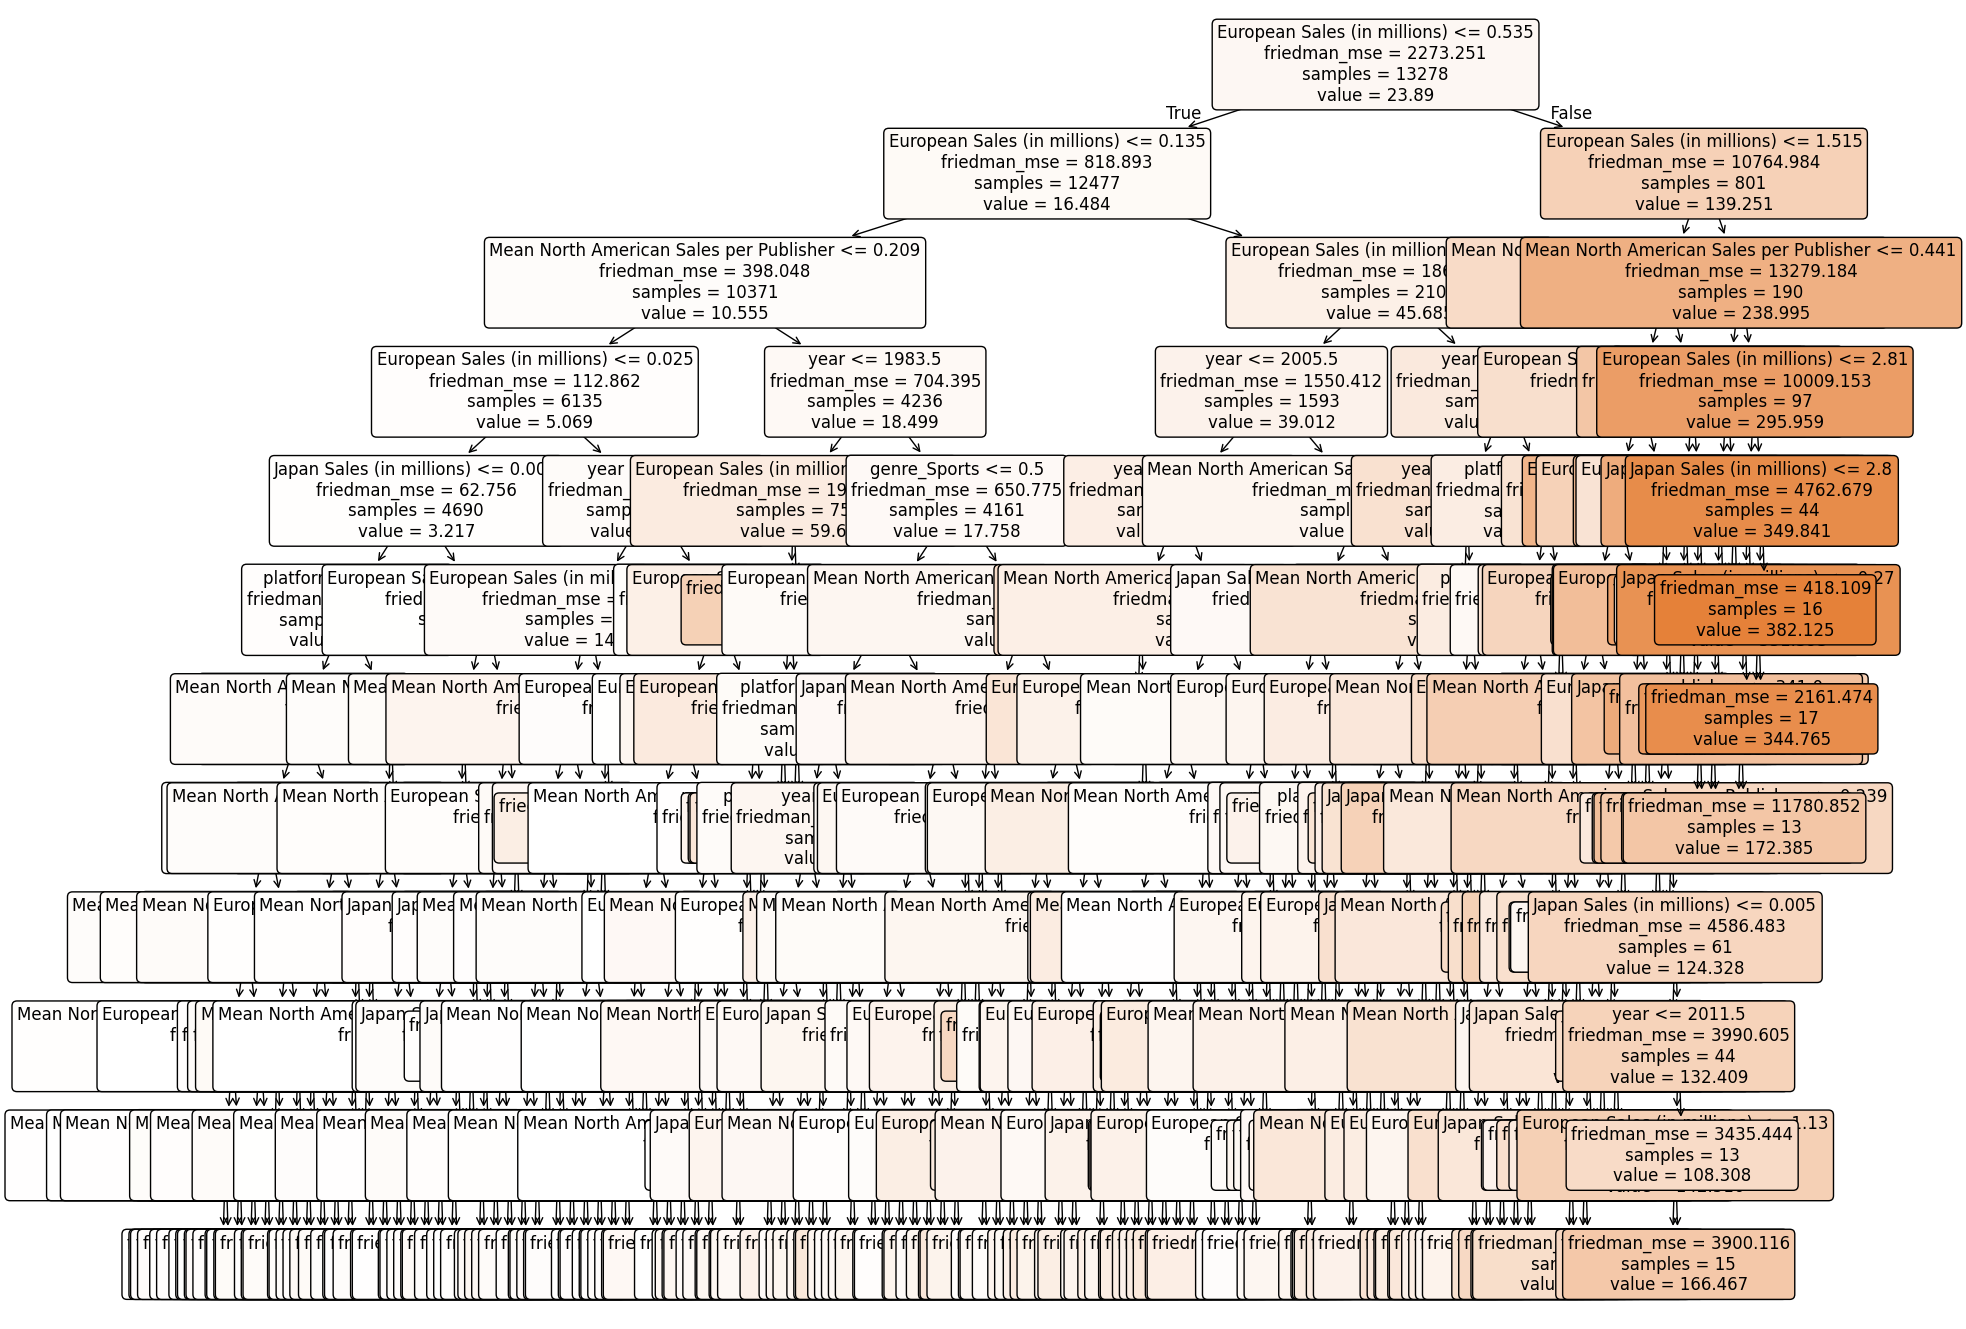

In [15]:
plt.figure(figsize=(20,17))
tree.plot_tree(
    final_model,
    feature_names=predictors.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
#plt.savefig("Feature Importance in Predicting North American Video Game Sales_DataPreprocessed.png", bbox_inches = "tight", dpi = 300)
plt.show()

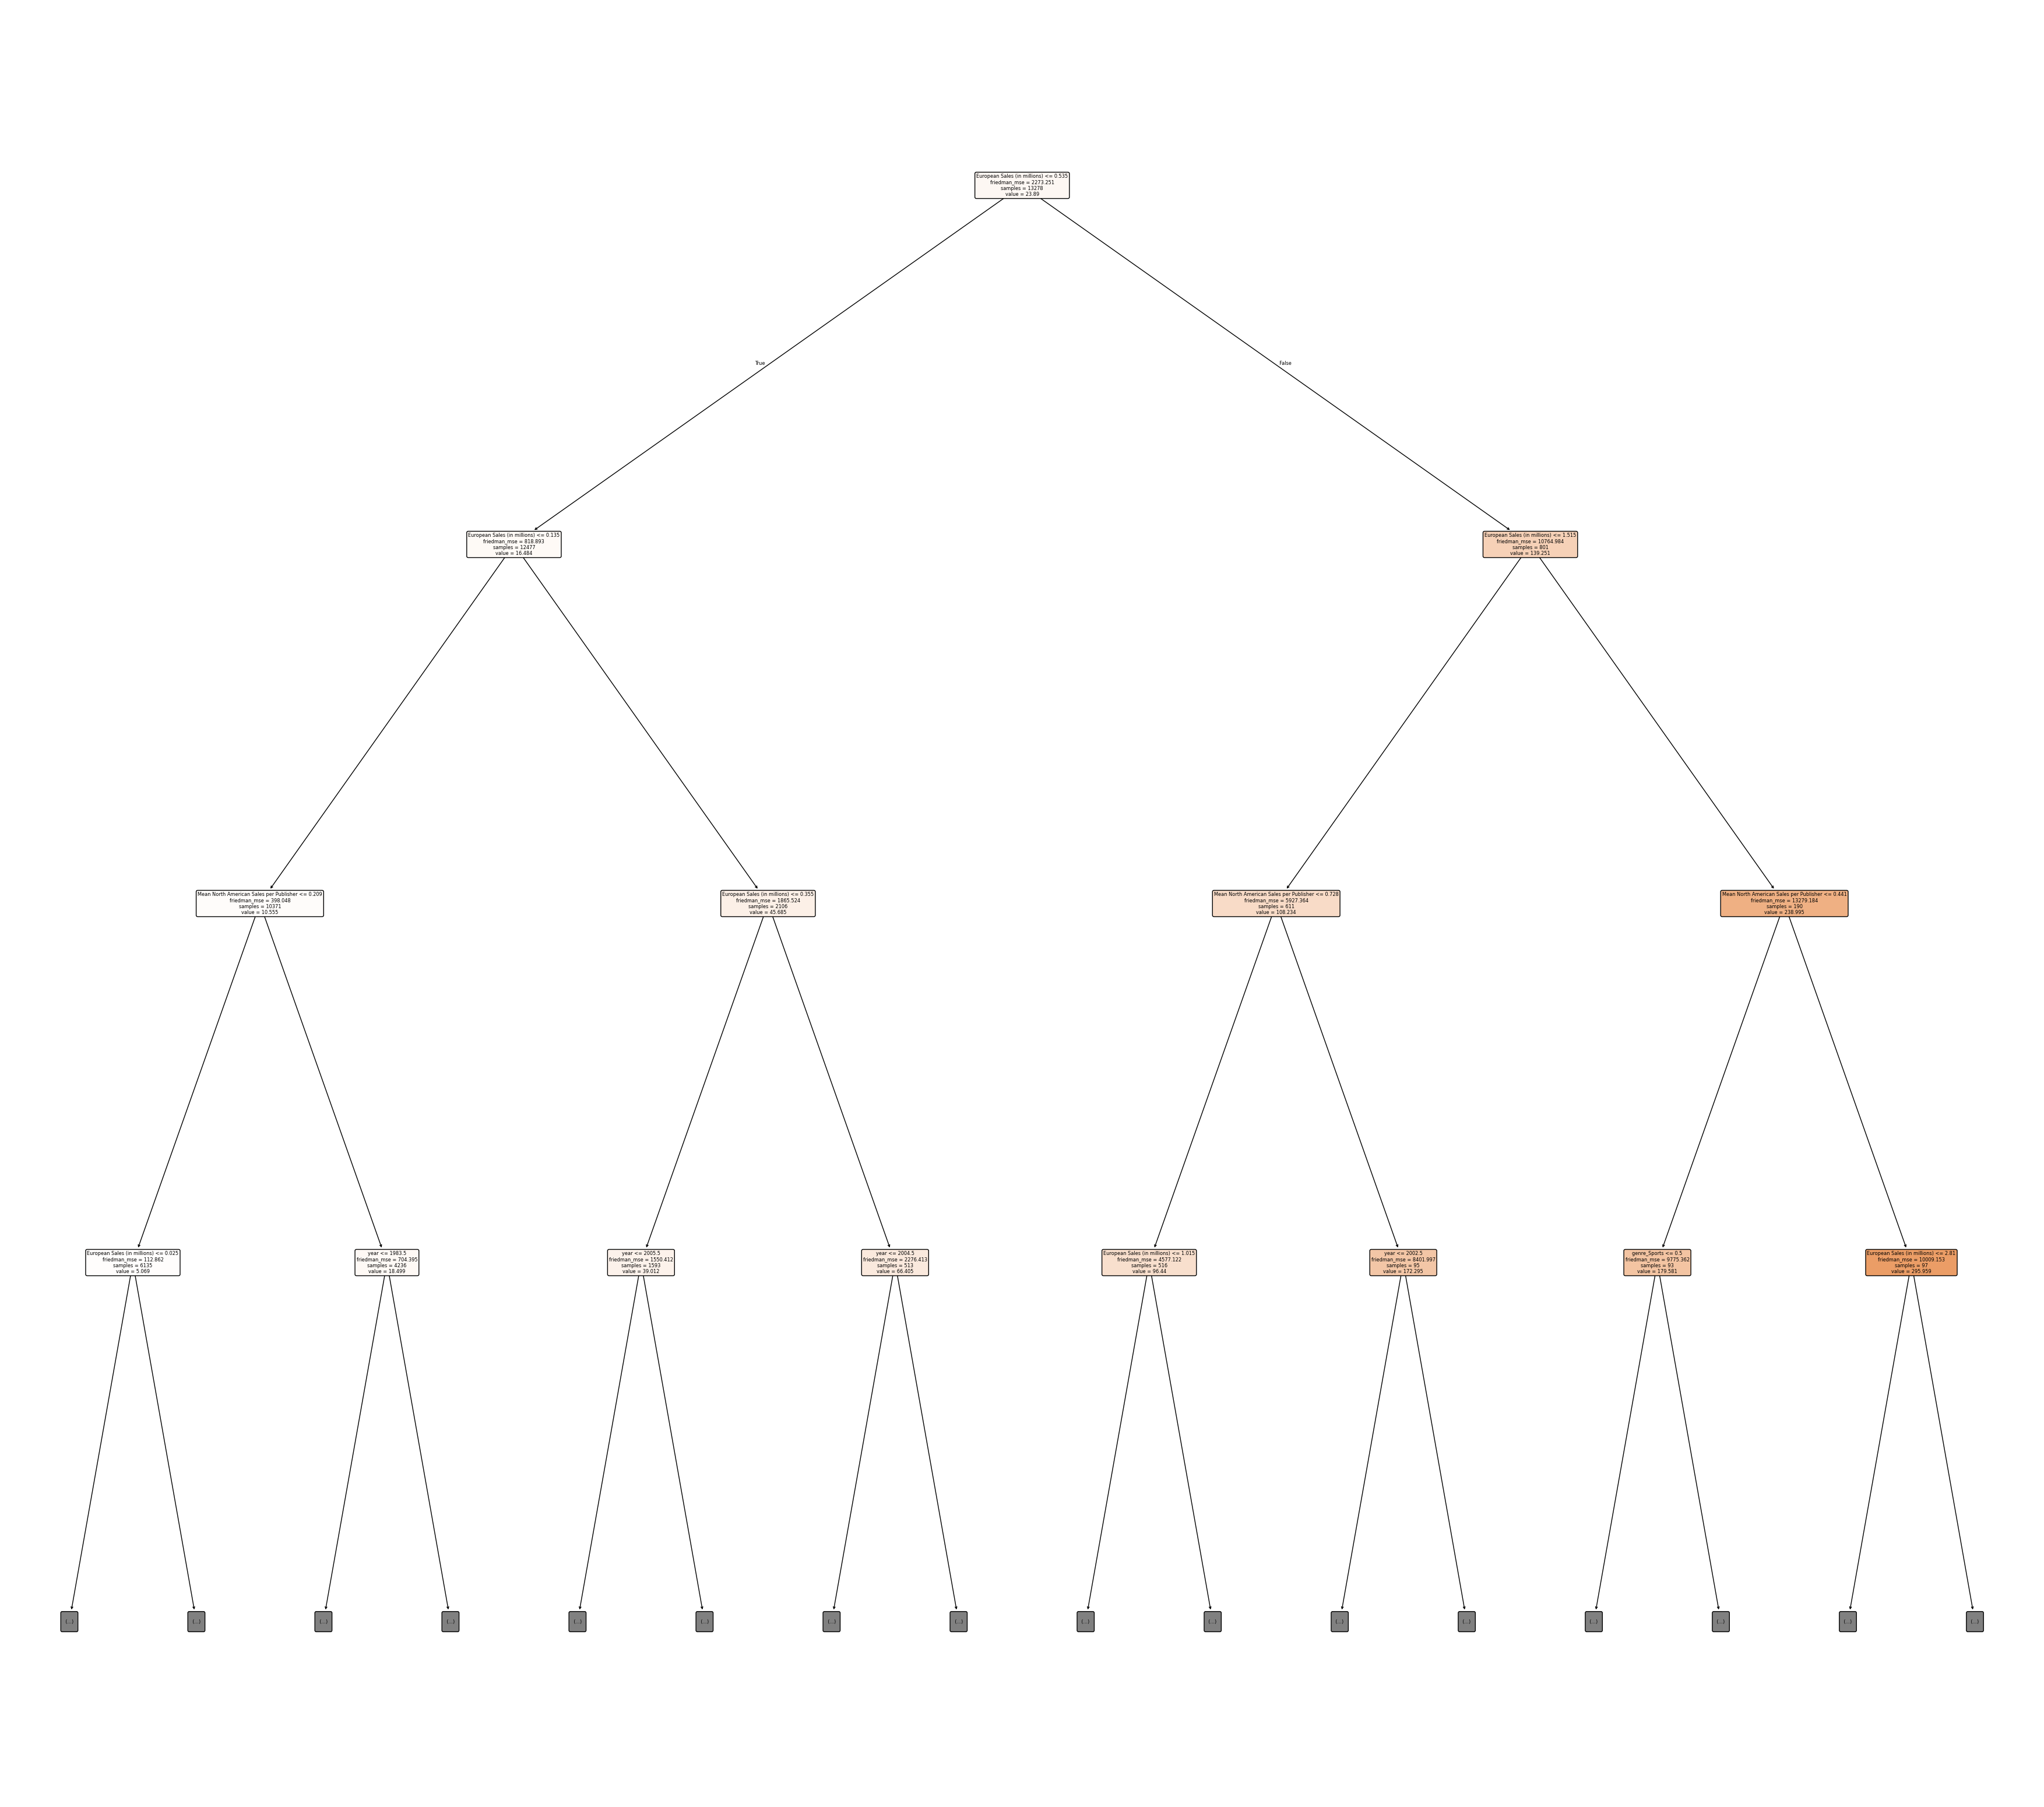

In [16]:
plt.figure(figsize=(45,40))
tree.plot_tree(final_model, max_depth=3, feature_names=predictors.columns, filled=True, rounded=True)
#plt.title("Decision Tree (Top 3 Levels)")
plt.savefig("Decision Tree (Top 3 Levels).png", bbox_inches = "tight", dpi = 300)
plt.show()

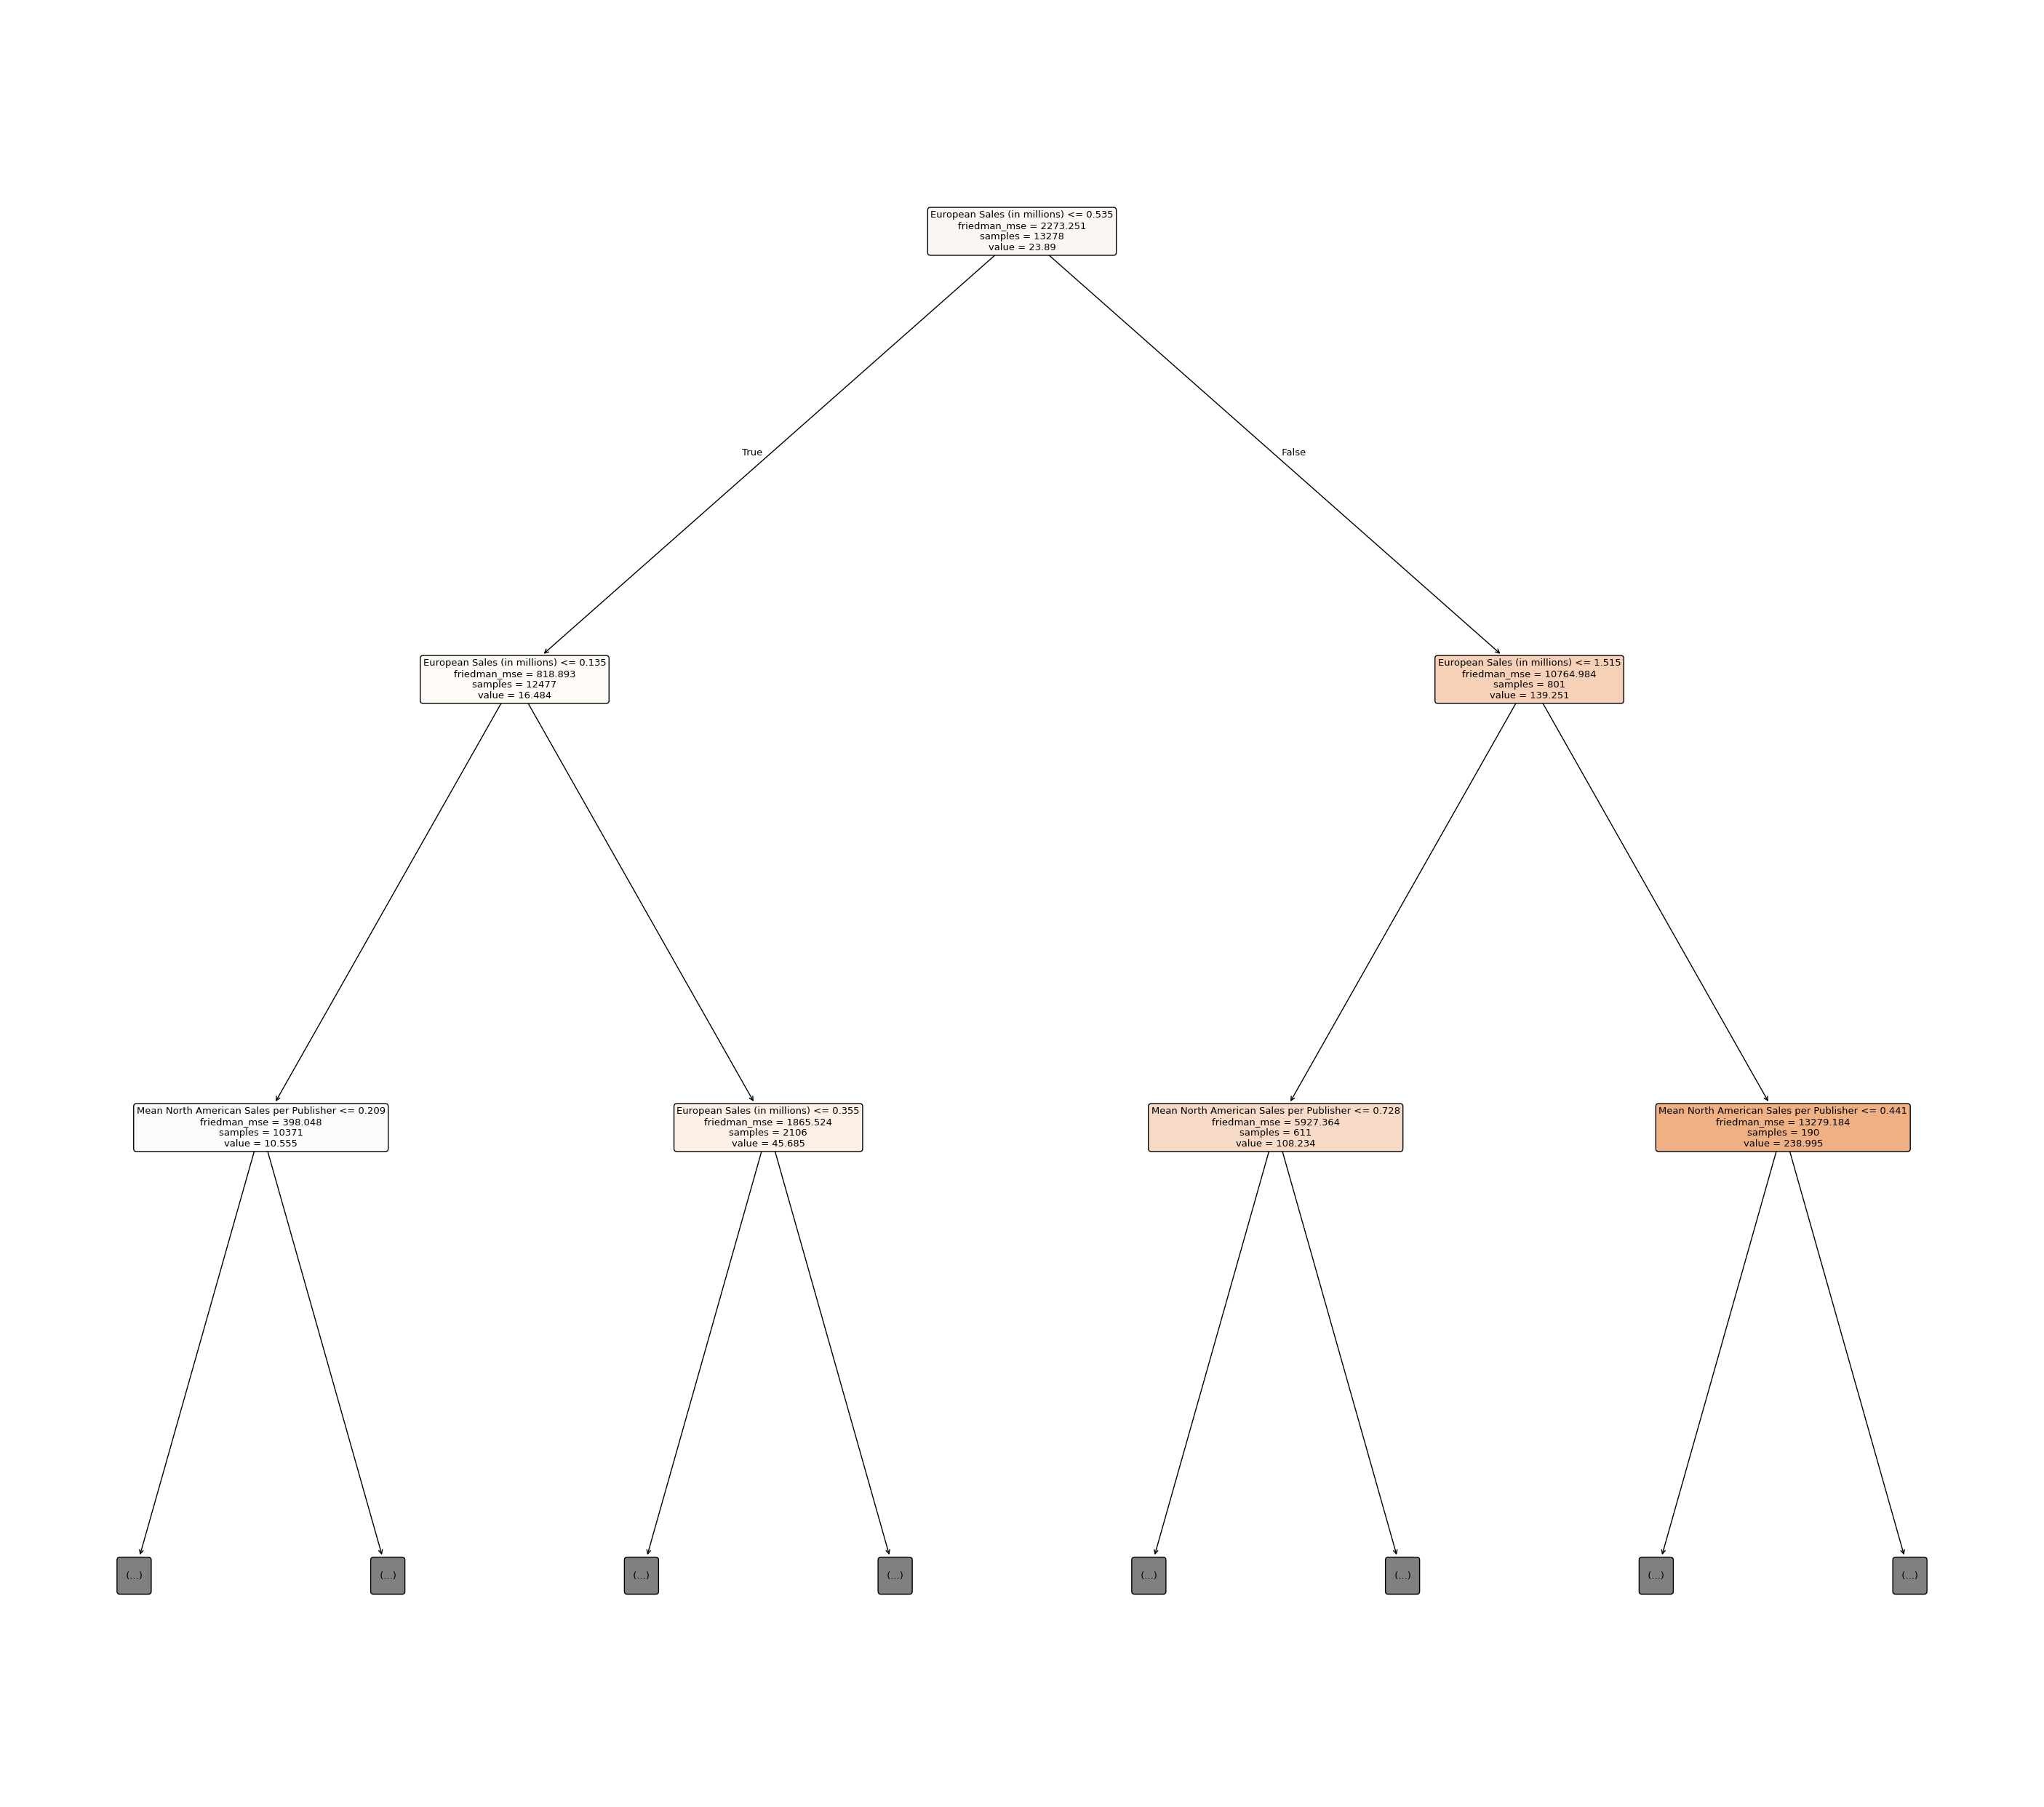

In [17]:
plt.figure(figsize=(36,32))
tree.plot_tree(final_model, max_depth=2, feature_names=predictors.columns, filled=True, rounded=True)
#plt.title("Decision Tree (Top 2 Levels)")
plt.savefig("Decision Tree (Top 2 Levels).png", bbox_inches = "tight", dpi = 300)
plt.show()

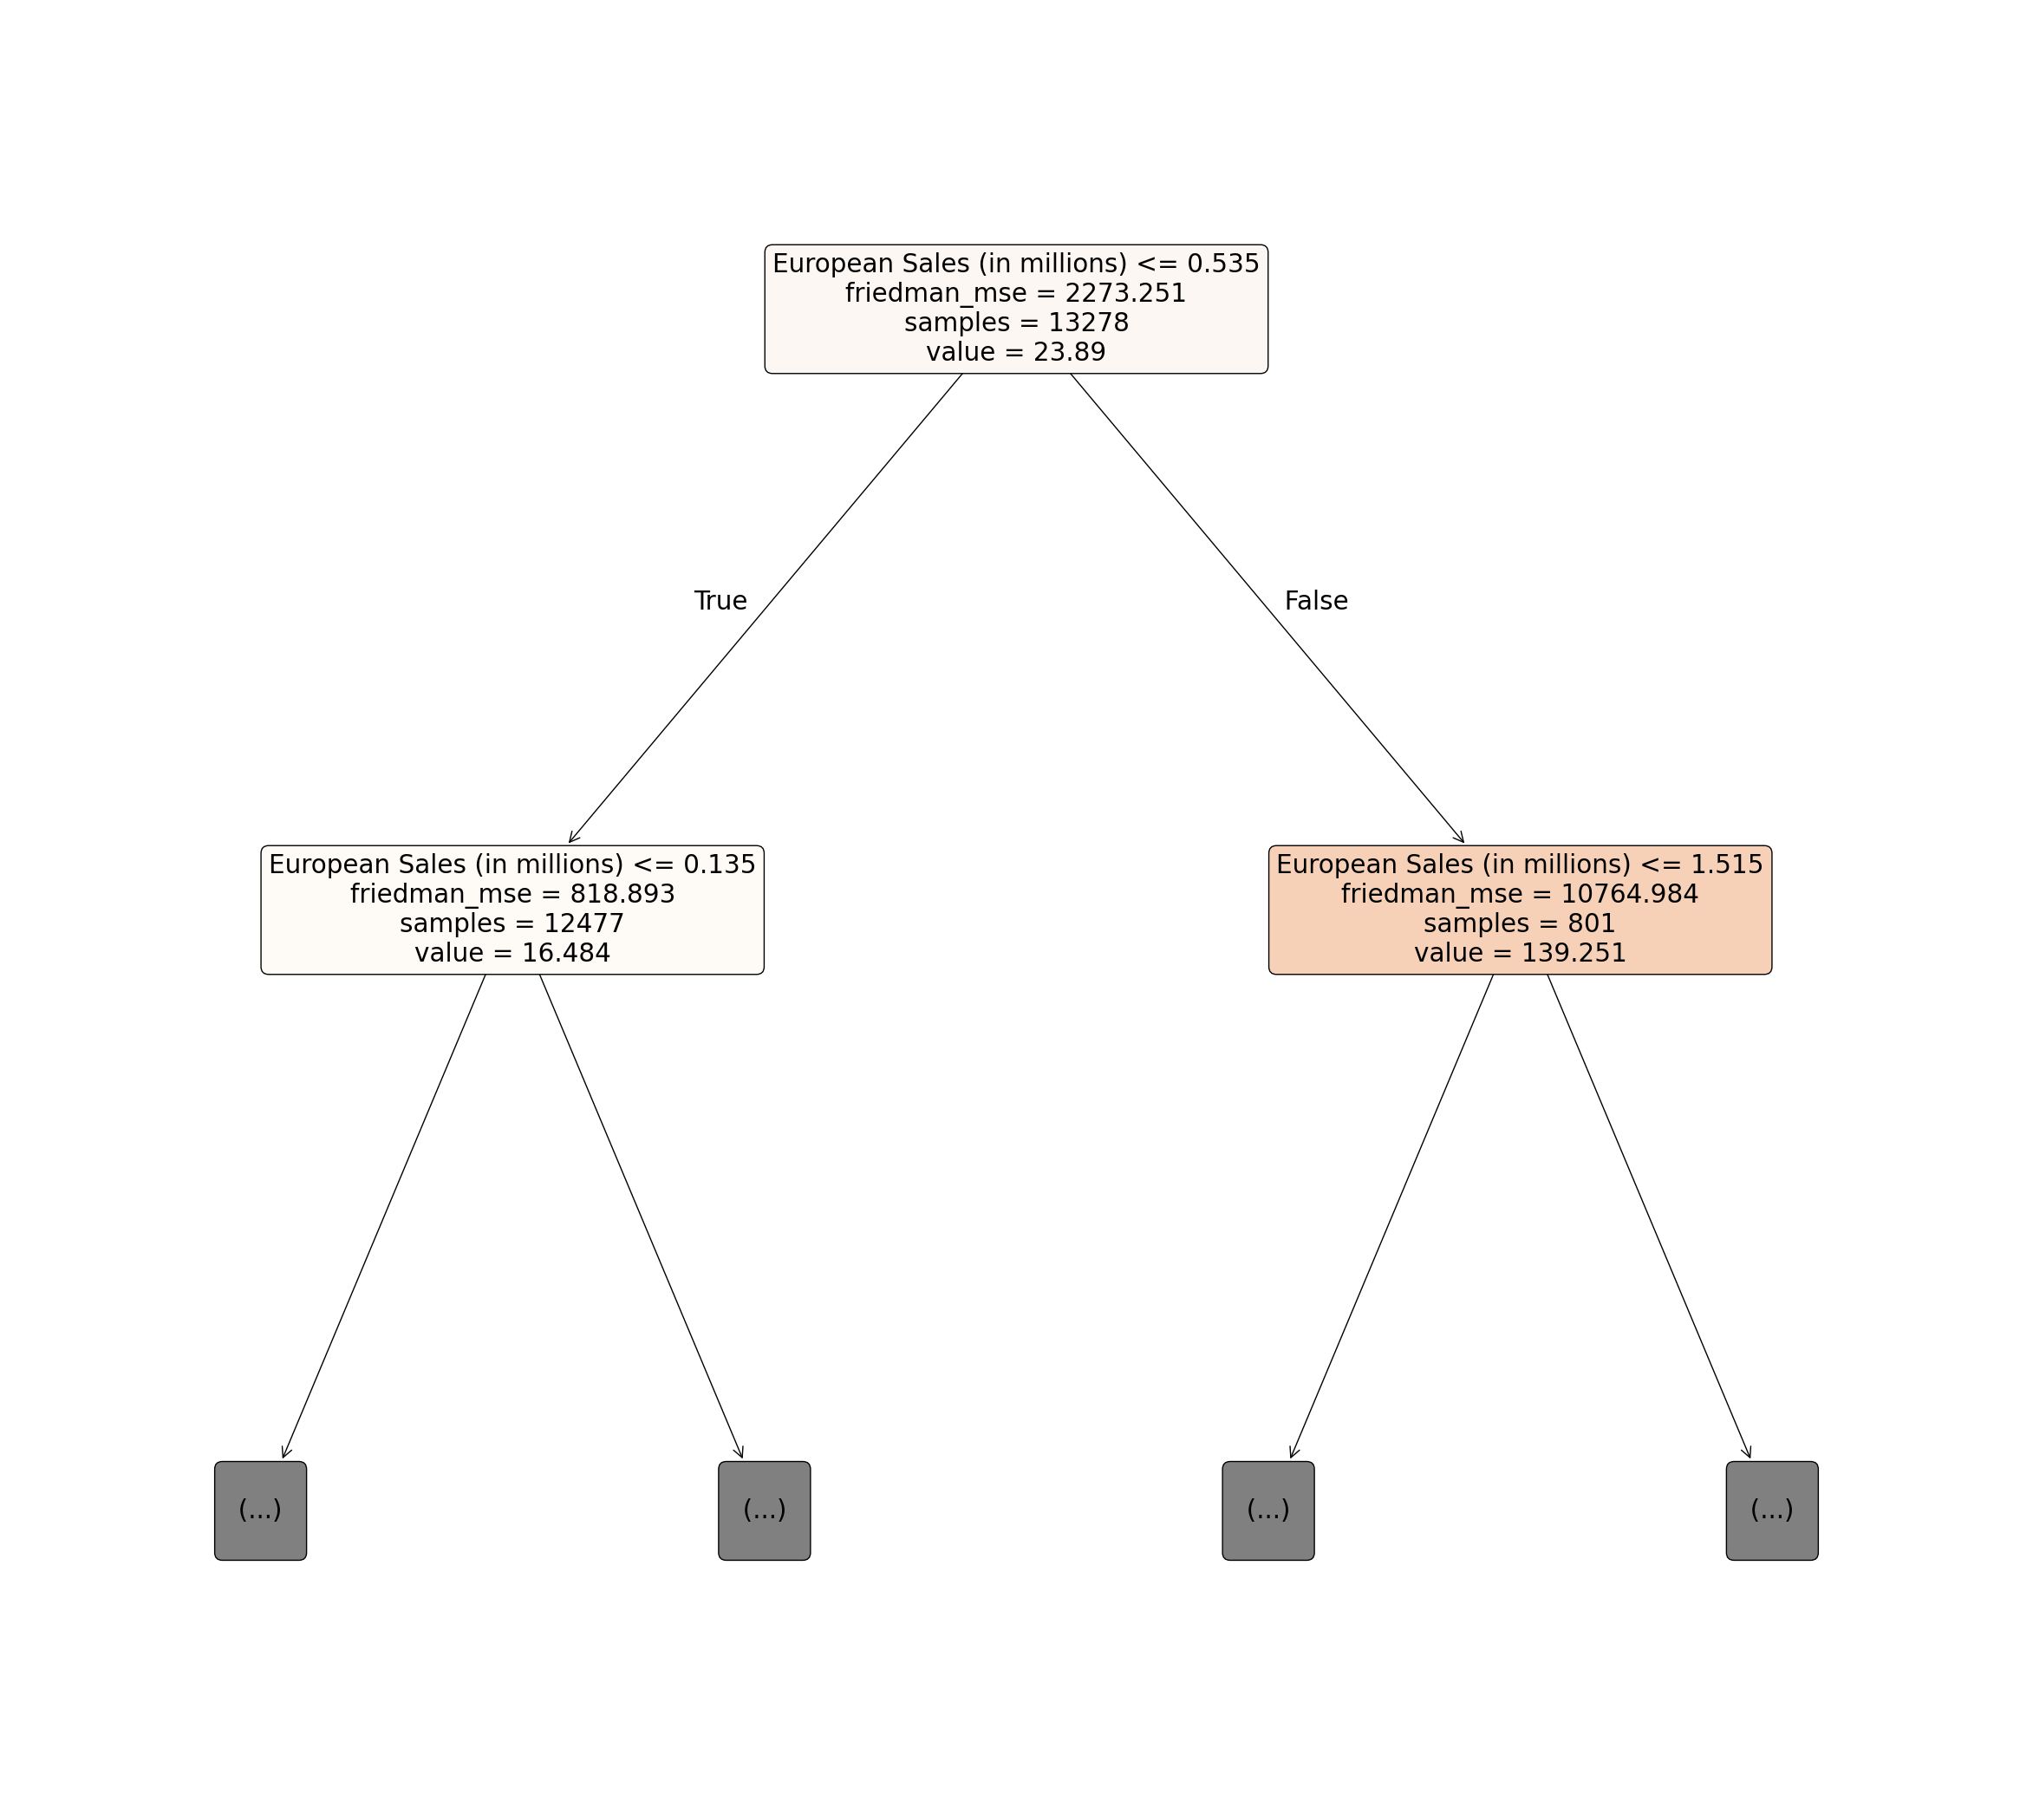

In [18]:
plt.figure(figsize=(30, 27))
tree.plot_tree(final_model, max_depth=1, feature_names=predictors.columns, filled=True, rounded=True)
#plt.title("Decision Tree (Top 1 Level)")
plt.savefig("Decision Tree (Top 1 Level).png", bbox_inches = "tight", dpi = 300)
plt.show()

In [19]:
# Predictions
Y_pred = final_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.5f}")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")

R² Score: 0.68877
MSE: 756.77552
RMSE: 27.50955


Pruning the tree yields higher model accuracy, with a 68% - 70% model accuracy. The increased accuracy suggests that Random orest may be a better model for analyzing the data.

## Random Forest